In [2]:
import cv2 
import skimage as ski
import matplotlib.pyplot as plt

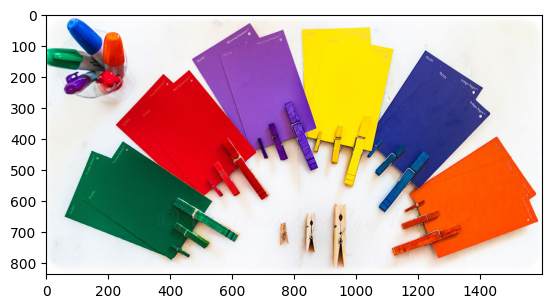

In [3]:
img =cv2.imread('img3.jpeg')
plt.imshow(img[:,:,::-1])

In [80]:
# spedific colours from image
#############################
#Red -> red_plane - gray
#Green -> g-plane - gray
#blue -> b-plane - gray
#cyan ->gray - red plane
#magenta-> gray-green plane
#yellow -> gray - blue plane


In [81]:
img.shape

(837, 1600, 3)

In [82]:
img[:,:,-1].shape

(837, 1600)

In [83]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
red_plane = img[:,:,-1].copy()
green_plane = img[:,:,-2].copy()
blue_plane = img[:,:,-3].copy()


In [84]:
red_color = cv2.subtract(red_plane, gray)
green_color = cv2.subtract(green_plane, gray)
blue_color = cv2.subtract(blue_plane, gray)
cyan_color = cv2.subtract(gray, red_plane)
magenta_color = cv2.subtract(gray, green_plane)
yellow_color = cv2.subtract(gray, blue_plane)

In [85]:
def imshow(im, title,type = '' ):
    if type:
        plt.imshow(im, cmap= type)
    else:
        plt.imshow(im)
    plt.title(title)
    plt.axis('off')        

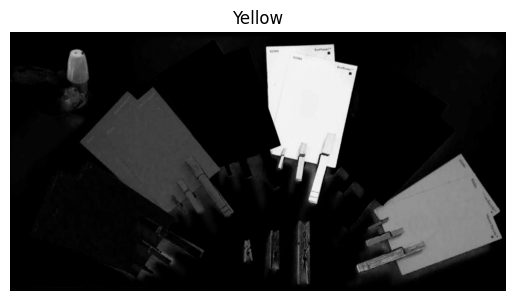

In [86]:
imshow(yellow_color , "Yellow","gray")
plt.show()

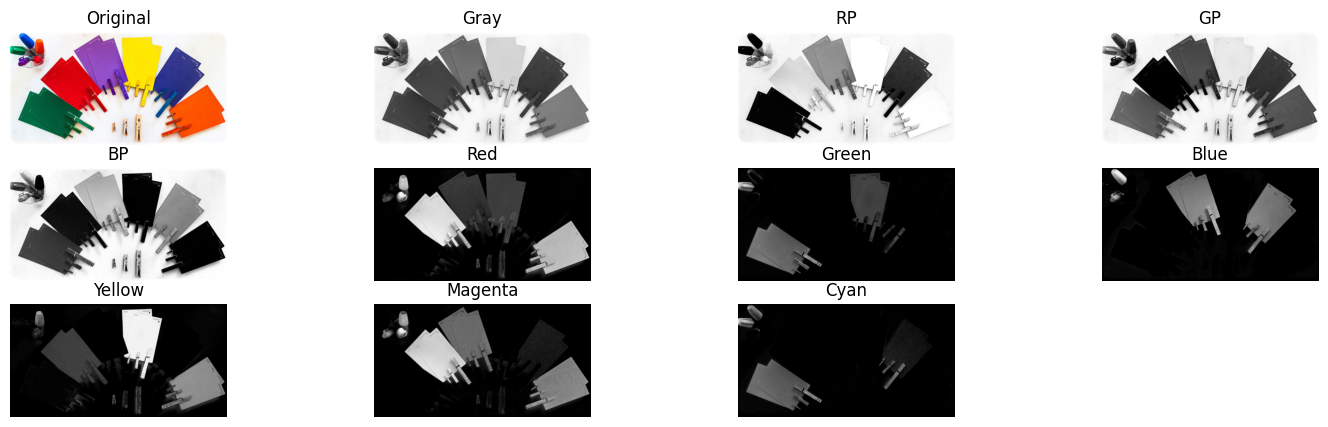

In [87]:
plt.figure(figsize = (18,5)) # create blank figure in which we make subplots
plt.subplot(3,4,1); imshow(img[:,:,::-1] , 'Original')
plt.subplot(3,4,2); imshow(gray,'Gray','gray')
plt.subplot(3,4,3); imshow(red_plane , 'RP','gray')
plt.subplot(3,4,4); imshow(green_plane , 'GP','gray')
plt.subplot(3,4,5); imshow(blue_plane , 'BP','gray')
plt.subplot(3,4,6); imshow(red_color , "Red","gray")
plt.subplot(3,4,7); imshow(green_color , "Green","gray")
plt.subplot(3,4,8); imshow(blue_color , "Blue","gray")
plt.subplot(3,4,9); imshow(yellow_color , "Yellow","gray")
plt.subplot(3,4,10); imshow(magenta_color , "Magenta","gray")
plt.subplot(3,4,11); imshow(cyan_color , "Cyan","gray")
    
plt.show()

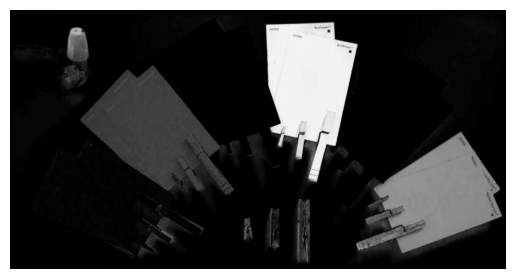

In [88]:
imshow(yellow_color, '', 'gray')

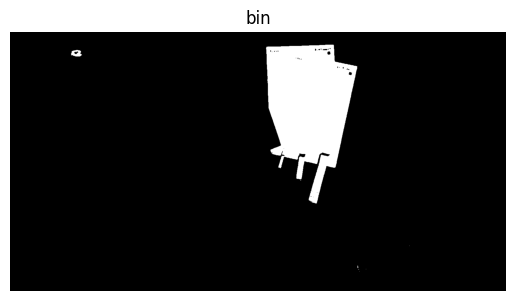

In [89]:
import cv2
th, y_bw = cv2.threshold(yellow_color, 140, 255, cv2.THRESH_BINARY)
imshow(y_bw,'bin','gray')

In [90]:
rp = ski.measure.regionprops(y_bw)

In [91]:
 rp

In [92]:
rp0 = rp[0]
y1,x1,y2,x2 = rp0.bbox 
len(rp)

1

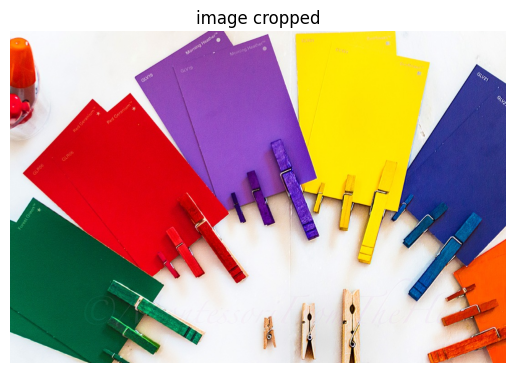

In [93]:
img_cropped = img[y1:y2,x1:x2].copy()
imshow(img_cropped[:,:,::-1],'image cropped')

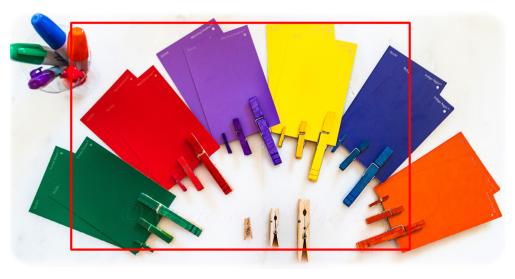

In [94]:
img_copy = img.copy()
cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=[0,0,255],thickness=5)
imshow(img_copy[:,:,::-1],'')